# Project 1: Linear Regression

> Resources:
> - https://www.geeksforgeeks.org/machine-learning/linear-regression-python-implementation
> - https://www.geeksforgeeks.org/machine-learning/ml-linear-regression
> - https://www.geeksforgeeks.org/machine-learning/ml-normal-equation-in-linear-regression
> - https://www.geeksforgeeks.org/machine-learning/gradient-descent-in-linear-regression
---

`Linear regression` is a statistical method that is used to **predict** a continuous dependent variable i.e target variable based on one or more independent variables.

#### Why Linear Regression is Important?
- **Simplicity and Interpretability**: It’s easy to understand and interpret, making it a starting point for learning about machine learning.
- **Basis for Other Models**: Many advanced algorithms, like logistic regression or neural networks, build on the concepts of linear regression.

#### Assumptions of the Linear Regression
1. Linearity: The relationship between inputs (X) and the output (Y) is a straight line.
2. Independence of Errors: The errors in predictions should not affect each other.
3. Constant Variance (Homoscedasticity): The errors should have equal spread across all values of the input. If the spread changes (like fans out or shrinks), it's called heteroscedasticity and it's a problem for the model.

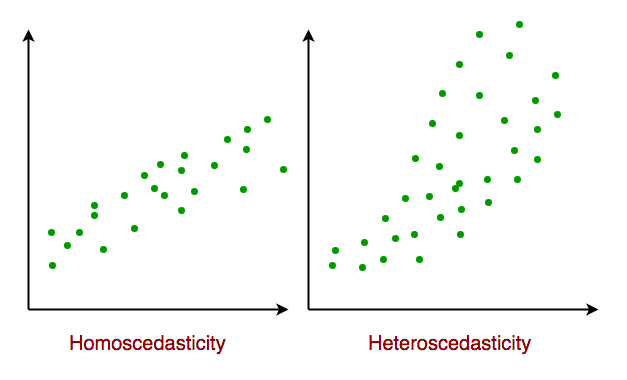

4. Normality of Errors: The errors should follow a normal (bell-shaped) distribution.
5. No Multicollinearity(for multiple regression): Input variables shouldn’t be too closely related to each other.
6. No Autocorrelation: Errors shouldn't show repeating patterns, especially in time-based data.
7. Additivity: The total effect on Y is just the sum of effects from each X, no mixing or interaction between them.'


# 1. Simple Linear Regression

When there is only one independent feature it is known as `Simple Linear Regression` or `Univariate Linear Regression`

In linear regression we assume that the two variables i.e. dependent and independent variables are linearly related.

Now, the task is to **find a line that fits best** in the above scatter plot so that we can predict the response for any new feature values. (i.e a value of x not present in a dataset) This line is called a regression line. 

The equation of the regression line is represented as: $h(x_i)=β_0+β_1x_i$

In [1]:
import numpy as np

# Datos
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=float)
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12], dtype=float)

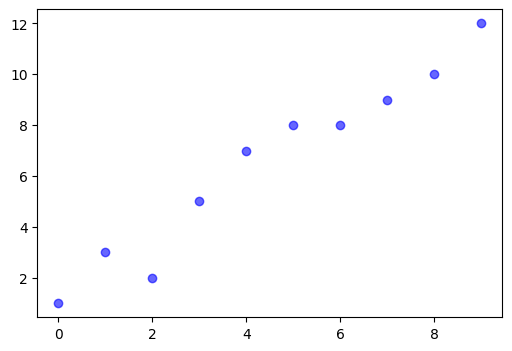

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.scatter(x, y, color='blue', alpha=0.6, label='Datos reales')
plt.show()

## The Statistical Way: Least Squares Estimation

One way to do it is **Least Squares**:

$y_i​= β_0​+β_1​x_i​+ε_i​=h(x_i​)+ε_i​⇒ε_i​=y_i​−h(x_i​ )$ 

Here, $e_i$ is a **residual error** in ith observation. 

So, our aim is to minimize the total residual error, which we call **cost**. The cost function is then:

$J(\beta_0, \beta_1) = \frac{1}{2} \sum_{i=1}^{n} \epsilon_i^2 = \frac{1}{2} \sum_{i=1}^{n} \left( y_i - (\beta_0 + \beta_1 x_i) \right)^2$

The factor $\frac{1}{2}$ is just for convenience in derivatives — it cancels nicely.

To find the minimum of $J(\beta_0, \beta_1)$, we set the partial derivatives to zero: $\frac{\partial J}{\partial \beta_0} = 0, \quad \frac{\partial J}{\partial \beta_1} = 0$

>**a) Partial derivative with respect to $\beta_0$** : $\frac{\partial J}{\partial \beta_0} = \sum_{i=1}^n -(y_i - \beta_0 - \beta_1 x_i) = 0$
> 
> Simplifying: $\sum_{i=1}^n y_i - n \beta_0 - \beta_1 \sum_{i=1}^n x_i = 0$
> 
> Divide through by $n$: $\beta_0 + \beta_1 \bar{x} = \bar{y} \quad \Rightarrow \quad \beta_0 = \bar{y} - \beta_1 \bar{x}$

> **b) Partial derivative with respect to $\beta_1$**
> 
> $\frac{\partial J}{\partial \beta_1} = \sum_{i=1}^n -(y_i - \beta_0 - \beta_1 x_i)x_i = 0$
> 
> Expanding: $\sum_{i=1}^n x_i y_i - \beta_0 \sum_{i=1}^n x_i - \beta_1 \sum_{i=1}^n x_i^2 = 0$
> 
> Substitute $\beta_0 = \bar{y} - \beta_1 \bar{x}$: $\sum x_i y_i - (\bar{y} - \beta_1 \bar{x}) \sum x_i - \beta_1 \sum x_i^2 = 0$
> 
> Simplify using $\sum x_i = n \bar{x}$: $\sum x_i y_i - n \bar{x} \bar{y} + \beta_1 n \bar{x}^2 - \beta_1 \sum x_i^2 = 0$
> 
> Factor $\beta_1$: $\beta_1 (\sum x_i^2 - n \bar{x}^2) = \sum x_i y_i - n \bar{x}\bar{y}$
> 
> Finally: $\beta_1 = \frac{\sum_{i=1}^n x_i y_i - n \bar{x} \bar{y}}{\sum_{i=1}^n x_i^2 - n \bar{x}^2} = \frac{SS_{xy}}{SS_{xx}}$
>
> Understanding the Sums:
> - Sum of squares of $x$ deviations: $SS_{xx} = \sum_{i=1}^n (x_i - \bar{x})^2 = \sum x_i^2 - n \bar{x}^2$
> - Sum of cross-deviations of $x$ and $y$: $SS_{xy} = \sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}) = \sum x_i y_i - n \bar{x}\bar{y}$

---

**Final Formulas**

The linear regression coefficients are: $\beta_1 = \frac{SS_{xy}}{SS_{xx}}, \quad \beta_0 = \bar{y} - \beta_1 \bar{x}$

- $\beta_1$ captures the slope of the best-fitting line.  
- $\beta_0$ adjusts the line vertically so it passes through the centroid $(\bar{x}, \bar{y})$.  


In [3]:
from typing import Tuple

def linear_regression_LSE(x: np.ndarray, y: np.ndarray) -> Tuple[float, float]:
    """
    Estimate linear regression coefficients using the Least Squares Estimator (LSE) formulas.
    
    Parameters:
        x (np.ndarray): Feature vector.
        y (np.ndarray): Target vector.
    
    Returns:
        tuple: (intercept, slope)
    """
    n = np.size(x)
    mean_x, mean_y = np.mean(x), np.mean(y)

    # Cross-deviation and deviation about x
    SS_xy = np.sum(y * x) - n * mean_y * mean_x
    SS_xx = np.sum(x * x) - n * mean_x * mean_x

    # Regression coefficients
    slope = SS_xy / SS_xx
    intercept = mean_y - slope * mean_x

    return intercept, slope


Estimated coefficients:
b_0 = 1.2363636363636363
b_1 = 1.1696969696969697


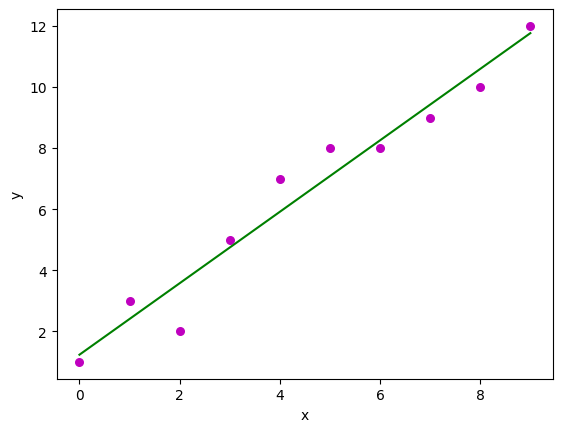

In [4]:
def plot_regression_line(x, y, b):
    """Plot the regression line along with the data points."""
    plt.scatter(x, y, color = "m", marker = "o", s = 30)
    y_pred = b[0] + b[1]*x              # predicted vector
    plt.plot(x, y_pred, color = "g")    # plotting the regression line
    plt.xlabel('x')
    plt.ylabel('y')
    
def main():
    # observations / data
    x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

    # estimating coefficients
    b = linear_regression_LSE(x, y)
    print("Estimated coefficients:\nb_0 = {}\nb_1 = {}".format(b[0], b[1]))
    plot_regression_line(x, y, b)

main()

---

## The Algebra Way: Normal Equation for Linear Regression

$\theta=(X^TX)^{−1} \cdot(X^T y)$

- $θ$: hypothesis parameters that define it the best. 
- $X$: Input feature value of each instance. 
- $Y$: Output value of each instance. 

In [5]:
def linear_regression_normal_eq(x: np.ndarray, y: np.ndarray) -> tuple[float, float] | None:
    """
    Estimate linear regression coefficients using the Normal Equation:
        theta = (XᵀX)⁻¹ Xᵀy
    
    Parameters:
        x (np.ndarray): Feature vector.
        y (np.ndarray): Target vector.
    
    Returns:
        tuple: (intercept, slope), or None if matrix inversion fails.
    """
    X = x.reshape(-1, 1) # Reshape x to a column vector (size(len(x), 1))
    
    # This allows us to write the linear regression formula as matrix multiplication: y_pred = mX+b = X_b·Θ, where Θ = [m,b]
    X_b = np.c_[np.ones((X.shape[0], 1)), X] # Add intercept (bias b: np.ones((len(x), 1)))

    X_T = X_b.T
    XTX = np.dot(X_T, X_b)
    XTy = np.dot(X_T, y)

    try:
        theta = np.linalg.solve(XTX, XTy)
        intercept, slope = theta
        return intercept, slope
    except np.linalg.LinAlgError:
        return None

LSE coefficients:
  Intercept = 1.2364
  Slope     = 1.1697

Normal Equation coefficients:
  Intercept = 1.2364
  Slope     = 1.1697


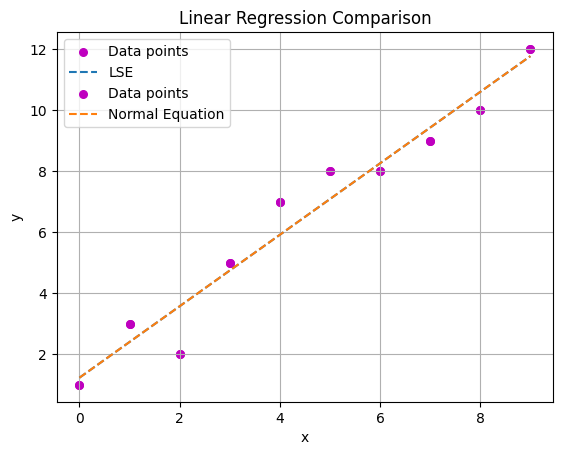

In [6]:
def plot_regression_line(x: np.ndarray, y: np.ndarray, coeffs: tuple[float, float], label: str) -> None:
    """
    Plot the regression line along with the data points.
    
    Parameters:
        x (np.ndarray): Feature vector.
        y (np.ndarray): Target vector.
        coeffs (tuple): (intercept, slope)
        label (str): Label for the regression line.
    """
    plt.scatter(x, y, color="m", marker="o", s=30, label="Data points")
    y_pred = coeffs[0] + coeffs[1] * x
    plt.plot(x, y_pred, "--", label=label)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)


def main():
    # Data
    x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

    # Method 1: Least Squares Estimator
    coeffs_LSE = linear_regression_LSE(x, y)
    print(f"LSE coefficients:\n  Intercept = {coeffs_LSE[0]:.4f}\n  Slope     = {coeffs_LSE[1]:.4f}")

    # Method 2: Normal Equation
    coeffs_NE = linear_regression_normal_eq(x, y)
    if coeffs_NE is not None:
        print(f"\nNormal Equation coefficients:\n  Intercept = {coeffs_NE[0]:.4f}\n  Slope     = {coeffs_NE[1]:.4f}")
    else:
        print("\nNormal Equation failed: singular matrix.")

    # Plot both results
    plot_regression_line(x, y, coeffs_LSE, label="LSE")
    if coeffs_NE is not None:
        plot_regression_line(x, y, coeffs_NE, label="Normal Equation")
    plt.title("Linear Regression Comparison")
    plt.show()


if __name__ == "__main__":
    main()

## The ML Way: Gradient Descent for Linear Regression

How it works:

0. Start with random values for slope and intercept.
1. Calculate the error between predicted and actual values.
2. Find how much each parameter contributes to the error (gradient).
3. Update the parameters in the direction that reduces the error.
4. Repeat until the error is as small as possible.

#### Why Use Gradient Descent for Linear Regression?

For simple linear regression, we can use formulas like Normal Equation to find parameters directly. However for large datasets or high-dimensional data these methods become computationally expensive due to:

- Large matrix computations.
- Memory limitations.

#### How Does Gradient Descent Work in Linear Regression?
1. Initializing Parameters: Start with random initial values for the slope ($m$) and intercept ($b$).
2. Calculate the Cost Function: Measure the error using the Mean Squared Error (MSE): $J(m,b)= \frac{1}{n}​ \sum^n_{i=1} (y_i​ −(mx_i​ +b))^2$
3. Compute the Gradient: Calculate how much the cost function changes with respect to $m$ and $b$.
    - For slope $m$:        $\frac{\partial J}{\partial m} = -\frac{2}{n} \sum_{i=1}^{n} x_i \left( y_i - (m x_i + b) \right)$
    - For intercept $b$:    $\frac{\partial J}{\partial b} = -\frac{2}{n} \sum_{i=1}^{n} \left( y_i - (m x_i + b) \right)$
4. Update Parameters: Change $m$ and $b$ to reduce the error:
    - For slope $m$:        $m = m - \alpha \cdot \frac{\partial J}{\partial m}$
    - For intercept $b$:    $b = b - \alpha \cdot \frac{\partial J}{\partial b}$
    
    Here $\alpha$ is the learning rate that controls the size of each update.
5. Repeat: Keep repeating steps 2–4 until the error stops decreasing significantly.



In [18]:
import numpy as np

def linear_regression_GD(x, y, learning_rate=0.01, n_iterations=200):
    """
    Estimate coefficients (intercept and slope) for simple linear regression using gradient descent.
    
    Parameters:
        x (np.ndarray): Input feature vector.
        y (np.ndarray): Target vector.
        learning_rate (float): Step size for gradient descent updates. (default=0.1)
        n_iterations (int): Number of iterations for gradient descent. (default=100)
    
    Returns:
        theta (np.ndarray): Estimated coefficients [intercept, slope].
    """
    
    n = len(y)
    X = x.reshape(-1, 1)  # Reshape x to a column vector
    
    # This allows us to write the linear regression formula as matrix multiplication: y_pred = mX+b = X_b·Θ, where Θ = [m,b]
    X_b = np.c_[np.ones((n, 1)), X]  # Add intercept (bias) (np.ones((n, 1)))
    theta = np.zeros(2)  # Initialize coefficients (intercept and slope) to zero
    
    # Gradient Descent
    for _ in range(n_iterations):
        y_pred = X_b.dot(theta) # Compute predictions     
        gradients = (2/n) * X_b.T.dot(y_pred - y) # Compute gradients of the mean squared error w.r.t. each parameter
        theta -= learning_rate * gradients # Update parameters using the learning rate
    
    return theta


LSE method coefficients: (np.float64(1.2363636363636363), np.float64(1.1696969696969697))
Normal equation coefficients: (np.float64(1.2363636363636323), np.float64(1.1696969696969703))
Gradient descent coefficients: [0.90652287 1.22229824]


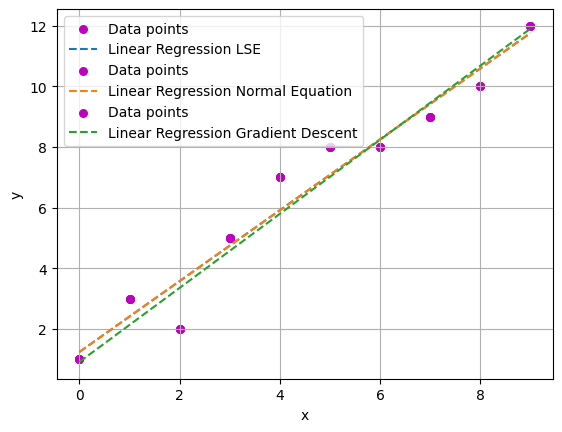

In [19]:
def main():
    # Data
    x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])
    
    # LSE method
    theta_lse = linear_regression_LSE(x, y)
    print("LSE method coefficients:", theta_lse)
    plot_regression_line(x, y, theta_lse, "Linear Regression LSE")

    # Normal equation method
    theta_normal = linear_regression_normal_eq(x, y)
    if theta_normal is not None:
        print("Normal equation coefficients:", theta_normal)
        plot_regression_line(x, y, theta_normal, "Linear Regression Normal Equation")
    else:
        print("Normal equation method failed: X^T X is singular.")

    # Gradient descent method
    theta_gd = linear_regression_GD(x, y)
    print("Gradient descent coefficients:", theta_gd)
    plot_regression_line(x, y, theta_gd, "Linear Regression Gradient Descent")

if __name__ == "__main__":
    main()